<a href="https://colab.research.google.com/github/Colette-c/MAT-422/blob/main/HW_4_1%2C_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph Modeling

A graph $G$ is denoted as a pair $G(V,E)$ where $V= \{v_1,v_2,...,v_n \}$ the set of nodes and $E=\{e_1,e_2,...,e_n\}$ is the set or edges.

The Laplacian matrix $L$ is a $n\times n$ symmetric matrix where $$L_{ij}=\left\{ \begin{array}{rcl} \sum_k E_{ik}, \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  \ \ \ \ \ \ \ \ \  \ \ \ \ \ \  \ \  \ \ \ \ \ \ \ \ \ \ \ \ i=j \\ -E_{ij}, \ \ \ \ \ \ i \neq j, \text{ and }v_i\text{ is adjacent to }v_j, \\ 0, \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  \ \ \ \ \ \ \ \ \ \ \ \  \ \ \ \ \ \ \ \text{otherwise}. \end{array}\right\} $$ with the following properties:
1. $L=D-M$, where $M$ is the adjaccency matrix and $D$ is the diagonal degree matrix with $D_{ii}=\sum_kE_{ik}$
2. $L=I_GI_G^T$
3. $L$ is symmetric positive semi-definite. All eigenvalues of $L$ are real and non-negative, and $L$ has a full set of $n$ real orthogonal eigenvectors
4. Let $e=[1,...,1]^T$, then $Le=0$. Thus $0$ is the smallest eigenvalue and $e$ is the corresponding eigenvector
5. If the graph $G$ has $c$ connected components, then $L$ has $c$ eigenvalues that is $0$
6. For any vector $x$,$x^TLx=\sum_{ \{ i,j \} \in E}E_{ij}(x_i-x_j)^2$
7. For any vector $x$ and scalars $\alpha,\beta$, $(\alpha x+\beta e)^TL(\alpha x+\beta e)=\alpha ^2x^TLx$
8. The problem $\min_{x\neq0}x^TLx$, subject to, $x^Tx=1, x^Te=0$ is solved when $x$ is the eigenvector corresponding to the second smallest eigenvalue (the Fiedler vector) $\lambda_2$ of the eigenvalue problem $Lx=\lambda x$

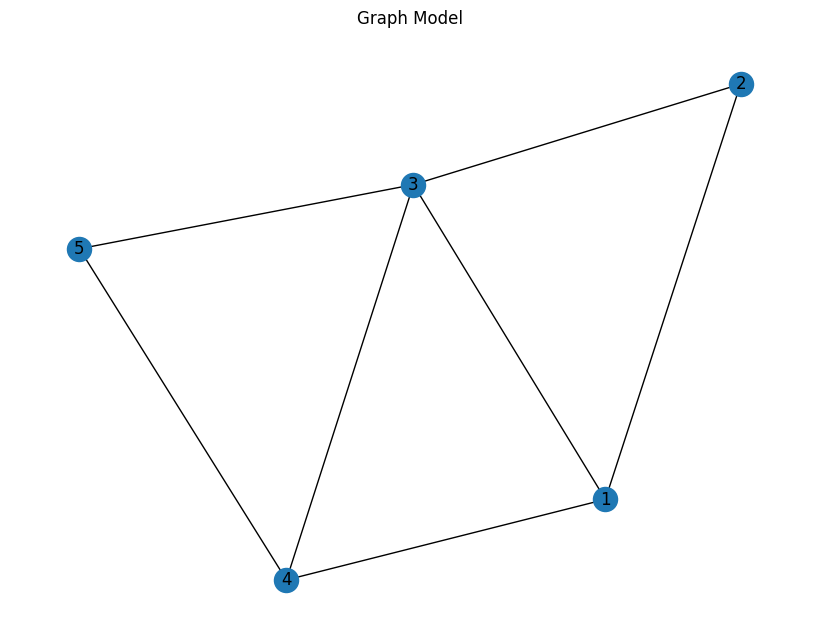

Laplacian Matrix:
[[ 3 -1 -1 -1  0]
 [-1  2 -1  0  0]
 [-1 -1  4 -1 -1]
 [-1  0 -1  3 -1]
 [ 0  0 -1 -1  2]]

Eigenvalues of the Laplacian Matrix:
[3.67761377e-16 1.58578644e+00 3.00000000e+00 4.41421356e+00
 5.00000000e+00]

Number of Connected Components:  1


In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

## Set of edges in our graph
E = [(1, 2), (2, 3), (3, 4), (4, 1), (1, 3), (3, 5), (4, 5)]
G.add_edges_from(E)

## Laplacian matrix
Lmat = nx.laplacian_matrix(G).toarray()

plt.figure(figsize=(8, 6))
nx.draw(G, pos=nx.spring_layout(G), with_labels=True)
plt.title("Graph Model")
plt.show()

print("Laplacian Matrix:")
print(Lmat)

lam, v = np.linalg.eigh(Lmat)
print("\nEigenvalues of the Laplacian Matrix:")
print(lam)

c = np.sum(lam < 1e-10)  ##lambda=0 means connected component
print("\nNumber of Connected Components: ", c)
